Model SEIR

S - susceptible (podatni na zachorowanie) $\newline$
E - exposed (wystawieni na działanie wirusa, w okresie inkubacji, nie zarażają) $\newline$
I - infectious (zarażający, chorzy) $\newline$
R - removed (przechorowani, zmarli) $\newline$

Schemat transmisji ma postać: S -> E -> I -> R

Model opisywany jest następującymi równaniami:

$\\ \frac{dS}{dt} = -\frac{\beta I(t)}{N}S(t)$ $\newline$
$\frac{dE}{dt} = \frac{\beta I(t)}{N}S(t) - \sigma E(t)$ $\newline$
$\frac{dI}{dt} = \sigma E(t) - \gamma I(t)$ $\newline$
$\frac{dR}{dt} = \gamma I(t)$ $\newline$

gdzie:
$\\ \beta$ - współczynnik zakażeń (kontaktów) $\newline$
$\sigma$ - współczynnik inkubacji (tempo, w jakim osobniki podatne na zakażenie zostają zainfekowane) $\newline$
$\gamma$ - współczynnik ozdrowień (tempo, w jakim osobniki zainfekowane przechodzą do grupy R) $\newline$
Wszystkie parametry są dodatnie

Z uwagi na to, że liczba osobników w populacji jest zwykle bardzo duża, funkcje S, E, I, R wygodnie jest znormalizować podając względną liczbę osobników w każdej grupie, tj.:
$s = \frac{S}{N}$ $\newline$
$e = \frac{E}{N}$ $\newline$
$i = \frac{I}{N}$ $\newline$
$r = \frac{R}{N}$ $\newline$
Równoważny układ równań różniczkowych opisujących model epidemiologiczny ma postać:
$\\ \frac{ds}{dt} = -\beta i(t) s(t)$ $\newline$
$\frac{de}{dt} = \beta i(t) s(t) - \sigma e(t)$ $\newline$
$\frac{di}{dt} = \sigma e(t) - \gamma i(t)$ $\newline$
$\frac{dr}{dt} = \gamma i(t)$

Zad. 1. Stosując metodę Rungego-Kutty czwartego rzędu znaleźć rozwiązanie numeryczne zagadnienia początkowego modelu SEIR z warunkami początkowymi:

$s(0) = 0.99 \\$
$e(0) = 0.01 \\$
$i(0) = 0 \\$
$r(0) = 0 \\$

dla parametrów: $\beta = 1$, $\sigma = 1$, $\gamma = 0.1$. Wyniki przedstawić na wykresie.

Rownanie Rungego-Kutty 4 rzedu: $\\$
$x(t+h) \approx x(t) + \frac{1}{6}(F_1+2F_2+2F_3+F4) \\$
$F_1 = h*f(t,x) \\$
$F_2 = h*f(t+\frac{1}{2}h,x+\frac{1}{2}F_1) \\$
$F_3 = h*f(t+\frac{1}{2}h,x+\frac{1}{2}F_2) \\$
$F_4 = h*f(t+h,x+\frac{1}{2}F_3) \\$

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def s_prim(beta, i, s):
    return -beta * i * s

def e_prim(beta, i, s, sigma, e):
    return beta * i * s - sigma * e

def i_prim(sigma, e, gamma, i):
    return sigma * e - gamma * i

def r_prim(gamma, i):
    return gamma * i


def RK(h, beta, i, s, sigma, e, gamma, r):
    last_i = i[-1]
    last_s = s[-1]
    last_e = e[-1]
    last_r = r[-1]

    s_F1 = h * s_prim(beta, last_i, last_s)
    e_F1 = h * e_prim(beta, last_i, last_s, sigma, last_e)
    i_F1 = h * i_prim(sigma, last_e, gamma, last_i)
    r_F1 = h * r_prim(gamma, last_i)

    s_F2 = h * s_prim(beta, last_i+0.5*i_F1, last_s+0.5*s_F1)
    e_F2 = h * e_prim(beta, last_i+0.5*i_F1, last_s+0.5*s_F1, sigma, last_e+0.5*e_F1)
    i_F2 = h * i_prim(sigma, last_e+0.5*e_F1, gamma, last_i+0.5*i_F1)
    r_F2 = h * r_prim(gamma, last_i+0.5*i_F1)

    s_F3 = h * s_prim(beta, last_i+0.5*i_F2, last_s+0.5*s_F2)
    e_F3 = h * e_prim(beta, last_i+0.5*i_F2, last_s+0.5*s_F2, sigma, last_e+0.5*e_F2)
    i_F3 = h * i_prim(sigma, last_e+0.5*e_F2, gamma, last_i+0.5*i_F2)
    r_F3 = h * r_prim(gamma, last_i+0.5*i_F2)  

    s_F4 = h * s_prim(beta, last_i+i_F3, last_s+0.5*s_F3)
    e_F4 = h * e_prim(beta, last_i+i_F3, last_s+0.5*s_F3, sigma, last_e+0.5*e_F3)
    i_F4 = h * i_prim(sigma, last_e+e_F3, gamma, last_i+0.5*i_F3)
    r_F4 = h * r_prim(gamma, last_i+i_F3)  

    ds = last_s + (s_F1+2*s_F2+2*s_F3+s_F4)/6
    de = last_e + (e_F1+2*e_F2+2*e_F3+e_F4)/6
    di = last_i + (i_F1+2*i_F2+2*i_F3+i_F4)/6
    dr = last_r + (r_F1+2*r_F2+2*r_F3+r_F4)/6

    return ds, de, di, dr

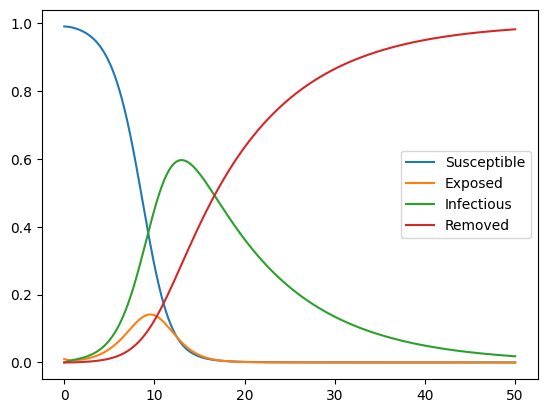

In [33]:
s = [0.99]
e = [0.01]
i = [0]
r = [0]

h = 0.001

beta, sigma, gamma = 1, 1, 0.1

t_space = np.arange(0,50,h)

for t in t_space:
    ds, de, di, dr = RK(h, beta, i, s, sigma, e, gamma, r)
    s.append(ds)
    e.append(de)
    i.append(di)
    r.append(dr)

plt.plot(t_space, s[:-1], label='Susceptible')
plt.plot(t_space, e[:-1], label='Exposed')
plt.plot(t_space, i[:-1], label='Infectious')
plt.plot(t_space, r[:-1], label='Removed')
plt.legend()
plt.show()

Zad. 2. Co stanie się z wykresem funkcji e(t) i i(t), kiedy parametr $\beta$ zmniejszymy o połowę względem wartości z poprzedniego zadania? Wytłumaczyć jego wpływ na przebieg epidemii. Wyniki przedstawić na wykresie

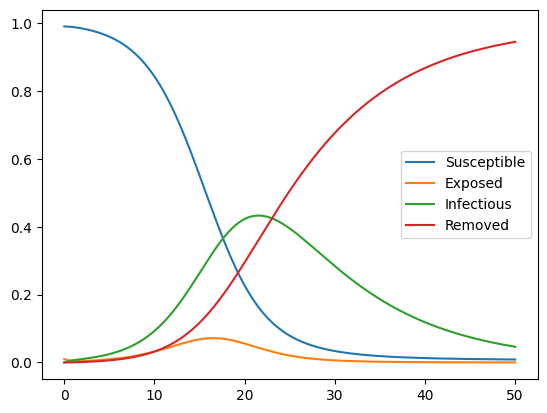

In [34]:
s = [0.99]
e = [0.01]
i = [0]
r = [0]

h = 0.001

beta, sigma, gamma = 0.5, 1, 0.1

t_space = np.arange(0,50,h)

for t in t_space:
    ds, de, di, dr = RK(h, beta, i, s, sigma, e, gamma, r)
    s.append(ds)
    e.append(de)
    i.append(di)
    r.append(dr)

plt.plot(t_space, s[:-1], label='Susceptible')
plt.plot(t_space, e[:-1], label='Exposed')
plt.plot(t_space, i[:-1], label='Infectious')
plt.plot(t_space, r[:-1], label='Removed')
plt.legend()
plt.show()

Zmniejszego wartości parametru $\beta$, czyli współczynnika zakażeń powoduje spowolnienie tempa wzrostu zachorowań oraz sprawi, że mniej osób na raz będzie chorych, zarówno tych u których choroba jest w okresie inkubacji(Exposed) oraz tych zarażających(Infectious)

Zad. 3. Parametr reprodukcji $R_0$ odgrywa ważną rolę w modelach epidemiologicznych. Opisuje on średnią liczbę osób, którą zarazi jedna osoba z grupy I. Jego wartość przekraczająca 1, oznacza, że jeden chory zaraża więcej niż jedną osobę. W konsekwencji liczba zakażonych rośnie, a epidemia wciąż się rozwija. Jeśli jest mniejszy od 1, to nie dochodzi do rozwoju epidemii - epidemia wygasa. Współczynnik reprodukcji możemy wyrazić następującym wzorem: $\newline$
$R_0 = \frac{\beta}{\gamma}s(0)$ $\newline$

Dobrać parametry tak, aby parametr reprodukcji $R_0$ był mniejszy/większy od 1, pokazać rozwiązania na wykresach oraz omówić wyniki.


Przypadek 1 (epidemia rozwija się): $\newline$
$R_0 = \frac{\beta}{\gamma}s(0) = \frac{1}{0.5}*0.99 = 1.98 > 1$ $\newline$
$R_0 > 1 <=> \beta > \frac{\gamma}{s(0)}$

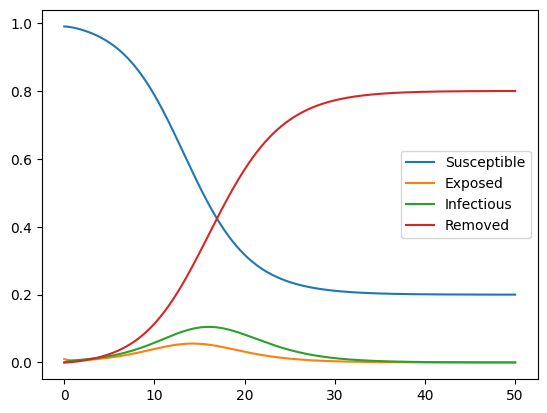

In [35]:
s = [0.99]
e = [0.01]
i = [0]
r = [0]

h = 0.001

beta, sigma, gamma = 1, 1, 0.5

t_space = np.arange(0,50,h)

for t in t_space:
    ds, de, di, dr = RK(h, beta, i, s, sigma, e, gamma, r)
    s.append(ds)
    e.append(de)
    i.append(di)
    r.append(dr)

plt.plot(t_space, s[:-1], label='Susceptible')
plt.plot(t_space, e[:-1], label='Exposed')
plt.plot(t_space, i[:-1], label='Infectious')
plt.plot(t_space, r[:-1], label='Removed')
plt.legend()
plt.show()

Przypadek 2 (epidemia gaśnie): $\newline$
$R_0 = \frac{\beta}{\gamma}s(0) = \frac{0.5}{1}*0.99 = 0.495 < 1$ $\newline$
$R_0 < 1 <=> \beta < \frac{\gamma}{s(0)}$

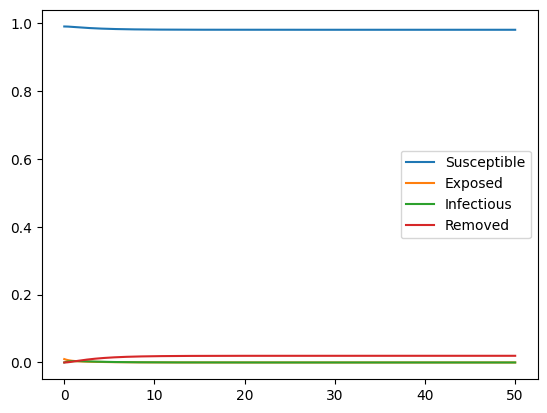

In [36]:
s = [0.99]
e = [0.01]
i = [0]
r = [0]

h = 0.001

beta, sigma, gamma = 0.5, 1, 1

t_space = np.arange(0,50,h)

for t in t_space:
    ds, de, di, dr = RK(h, beta, i, s, sigma, e, gamma, r)
    s.append(ds)
    e.append(de)
    i.append(di)
    r.append(dr)

plt.plot(t_space, s[:-1], label='Susceptible')
plt.plot(t_space, e[:-1], label='Exposed')
plt.plot(t_space, i[:-1], label='Infectious')
plt.plot(t_space, r[:-1], label='Removed')
plt.legend()
plt.show()

Jak widać na powyższych przykładach w przypadku kiedy $\beta$ jest większa od $\frac{\gamma}{s(0)}$ tzn. $R_0 > 1$ epidemia jest w stanie się rozwinąć do pewnego stopnia zależnego od wielkości różnicy $\beta$ i $\gamma$. Wygląda to analogicznie w przypadku kiedy $\beta$ jest mniejsza od $\frac{\gamma}{s(0)}$ tzn. $R_0 < 1$. Wtedy epidemia nie jest w stanie się rozwinąć.